In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_excel('3 врача.xlsx')

In [8]:
year_group = data.groupby(['Доктор', 'Год', 'Номер карты'], as_index=False).agg({'Новое посещение' : 'sum'}).rename(columns={'Новое посещение' : 'Кол-во посещений'})
year_group['Кол-во посещений'] = year_group['Кол-во посещений'].apply(lambda x: '4 и более' if x >= 4 else x)
year_group.groupby(['Доктор','Год', 'Кол-во посещений'], as_index=False).agg({'Номер карты' : 'count'}).rename(columns={'Номер карты' : 'Кол-во клиентов'}).to_excel('Посещения_по_годам_3_врача.xlsx')

C:\Users\AmanovRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


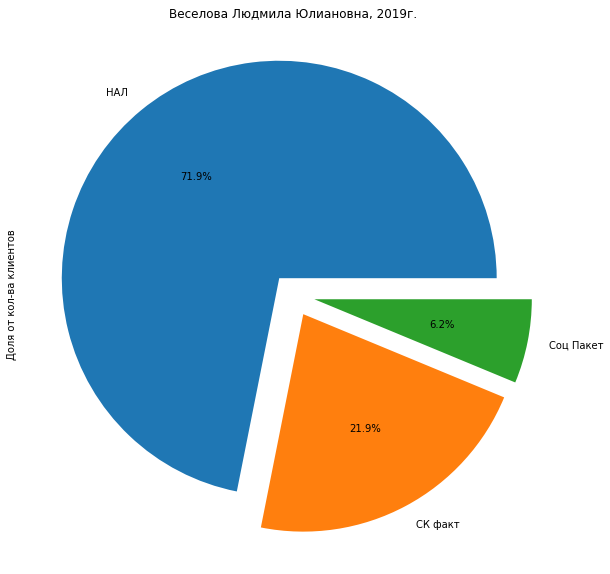

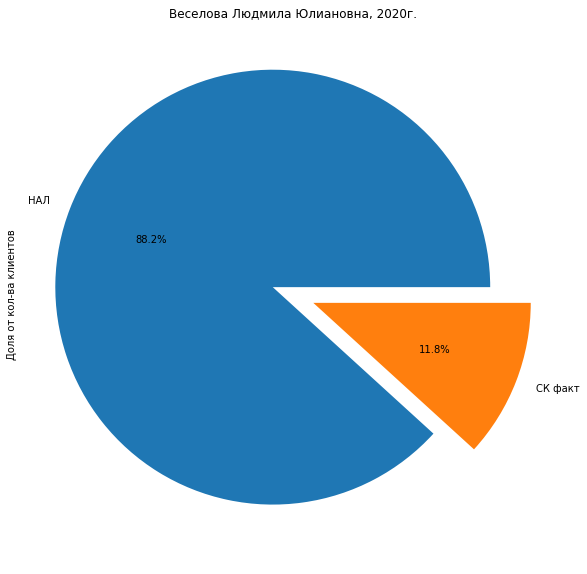

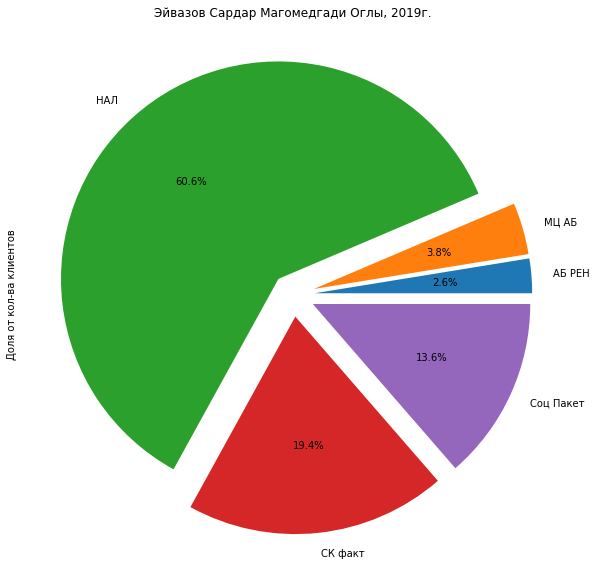

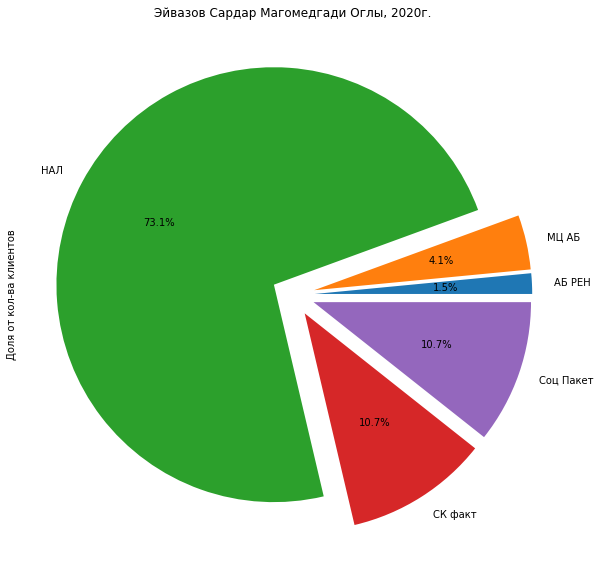

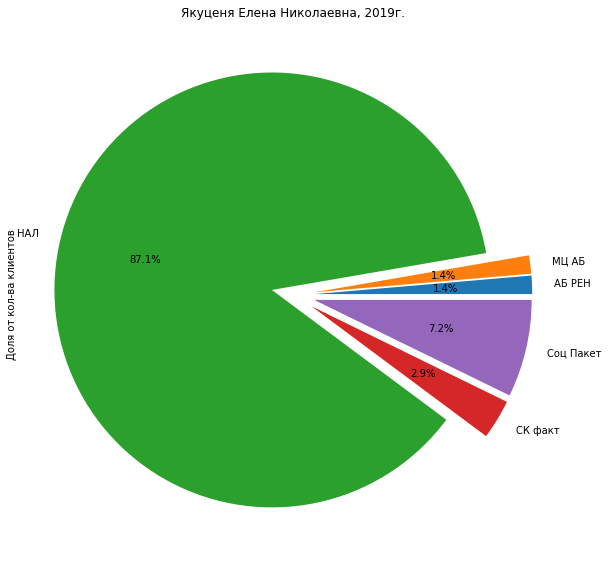

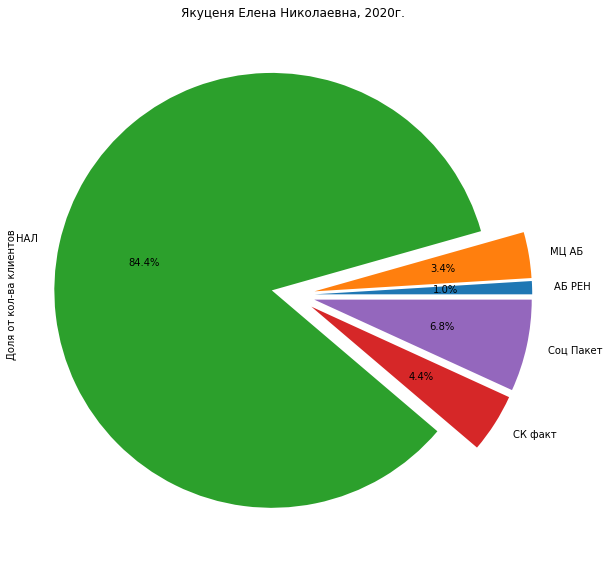

In [7]:
year_group1 = data.groupby(['Доктор', 'Год', 'Категория клиента'], as_index=False).agg({'Номер карты' : 'nunique'}).rename(columns={'Номер карты' : 'Кол-во клиентов'})
#year_group1[(year_group1['Год'] == 2020) & (year_group1['Доктор'] == 'Веселова Людмила Юлиановна')].plot(kind='pie', y='Кол-во клиентов', figsize=(10,10))
for doctor in set(year_group1['Доктор']):
    for year in (2019, 2020):
        temp_df = year_group1[(year_group1['Год'] == year) & (year_group1['Доктор'] == doctor)]
        temp_df.index = temp_df['Категория клиента'].tolist()
        s_summ = temp_df['Кол-во клиентов'].sum()
        size = temp_df.shape[0]
        explode = [0.1 for i in range(size)]
        temp_df['Доля от кол-ва клиентов'] = temp_df['Кол-во клиентов'] / s_summ
        temp_df.plot(kind='pie', y='Доля от кол-ва клиентов', figsize=(10,10), title = f'{doctor}, {year}г.', autopct='%1.1f%%', legend=False, explode=explode, shadow=False)

In [9]:
year_group1.to_excel('3_врача_по_категориям.xlsx')

In [10]:
year_group1

,Доктор,Год,Категория клиента,Кол-во клиентов
0,Веселова Людмила Юлиановна,2019,НАЛ,23
1,Веселова Людмила Юлиановна,2019,СК факт,7
2,Веселова Людмила Юлиановна,2019,Соц Пакет,2
3,Веселова Людмила Юлиановна,2020,НАЛ,15
4,Веселова Людмила Юлиановна,2020,СК факт,2
5,Эйвазов Сардар Магомедгади Оглы,2019,АБ РЕН,16
6,Эйвазов Сардар Магомедгади Оглы,2019,МЦ АБ,24
7,Эйвазов Сардар Магомедгади Оглы,2019,НАЛ,378
8,Эйвазов Сардар Магомедгади Оглы,2019,СК факт,121
9,Эйвазов Сардар Магомедгади Оглы,2019,Соц Пакет,85
